<a href="https://colab.research.google.com/github/charlespimentel/PROJ_QUEIMA_BR/blob/main/Trabalho_D_S_Prov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
pip install prov

In [100]:
import prov.model as prov
import datetime

In [101]:
from prov.model import ProvDocument

In [102]:
# Criando um novo documento de proveniância
d1 = ProvDocument()  # d1 agora é um documento de proveniência vazio

In [103]:
# Declarando namespace
d1.add_namespace('artigo', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx')
# Declarando namespace
d1.add_namespace('pessoas', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx')

<Namespace: artigo {https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx}>

In [104]:
#Entidade
e1 = d1.entity('artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx')

In [105]:
# Atribuindo o artigo ao agente
d1.wasAttributedTo(e1, 'pessoas:Mauro, Ronilson, Charles')

<ProvAttribution: (artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, artigo:Mauro, Ronilson, Charles)>

In [106]:
# Declarando namespace
d1.add_namespace('Inpe', 'https://queimadas.dgi.inpe.br/queimadas/bdqueimadas')
# Declarando namespace
d1.add_namespace('LASA', 'https://lasa.ufrj.br/')

<Namespace: LASA {https://lasa.ufrj.br/}>

In [107]:
d1.entity( 'Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20',{'prov:label':'Inpe_12_20','prov: type':'void: Dataset'}) 
d1.entity( 'LASA:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20' ,{'prov:label':'Lasa_12_20','prov: type':'void: Dataset'}) 

<ProvEntity: LASA:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20>

In [108]:
d1.wasDerivedFrom('artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx', 'Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20','LASA:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20')

<ProvDerivation: (artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20)>

In [109]:
# O que temos até agora (in PROV-N)
print(d1.get_provn())

document
  prefix artigo <https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx>
  prefix Inpe <https://queimadas.dgi.inpe.br/queimadas/bdqueimadas>
  prefix LASA <https://lasa.ufrj.br/>
  
  entity(artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx)
  wasAttributedTo(artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, artigo:Mauro, Ronilson, Charles)
  entity(Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20, [prov:label="Inpe_12_20", prov: type="void: Dataset"])
  entity(LASA:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20, [prov:label="Lasa_12_20", prov: type="void: Dataset"])
  wasDerivedFrom(artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20, LASA:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20, -, 

In [110]:
# Adicionando uma Atividade
d1.add_namespace('is', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/is/#')
d1.activity('is:escrever_artigo')

<ProvActivity: is:escrever_artigo>

In [111]:
# Usage and Generation
d1.used('is:escrever_artigo', 'Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20')
d1.used('is:escrever_artigo', 'LASA:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20')
d1.wasGeneratedBy('artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx', 'is:escreverArtigo')

<ProvGeneration: (artigo:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, is:escreverArtigo)>

In [112]:
# visualizar o gráfico
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('prov-artigo.png')

O acima salva o arquivo **PNG** como article-prov.png na sua pasta atual. 

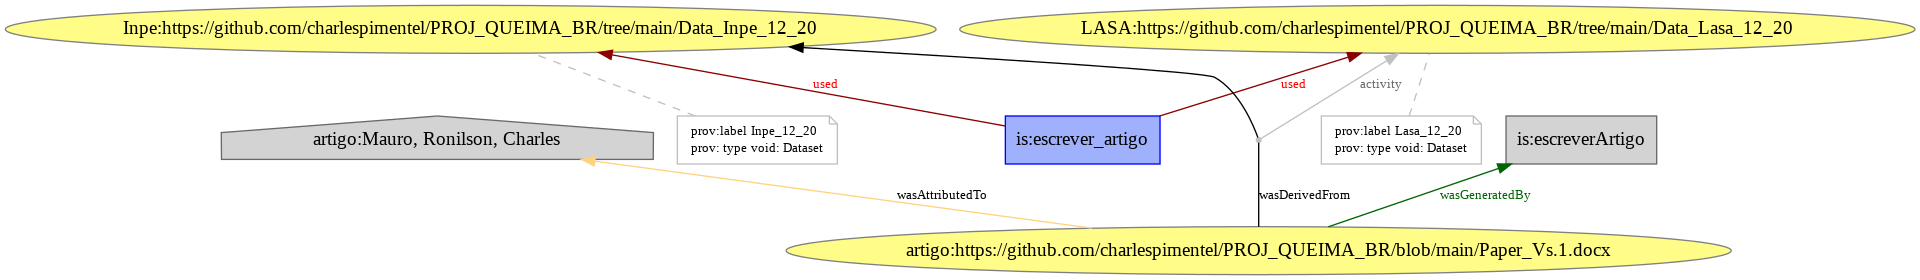

In [113]:
from IPython.display import Image
Image('prov-artigo.png')